In [ ]:
import tensorflow as tf
import pickle
from ResidualAttentionNetwork import ResidualAttentionNetwork
from matplotlib import pyplot as plt

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                          width_shift_range=0.2,
                                                          height_shift_range=0.2,
                                                          horizontal_flip=True,
                                                          validation_split=0.2)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train - x_train.mean()
x_test = x_test - x_test.mean()

datagen.fit(x_train)

input_shape = x_train.shape[1:]
output_size = 10

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
model = ResidualAttentionNetwork(input_shape=input_shape, output_size=output_size).Attention_92()
model.compile(tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])


history = model.fit(datagen.flow(x_train, y_train, batch_size=64, subset='training'), validation_data=datagen.flow(x_train, y_train, batch_size=64, subset='validation'),
                    epochs=200)

Epoch 1/200
625/625 [==============================] - 59s 68ms/step - loss: 1.9632 - accuracy: 0.2752 - val_loss: 2.0181 - val_accuracy: 0.3414
Epoch 2/200
625/625 [==============================] - 41s 65ms/step - loss: 1.5777 - accuracy: 0.4138 - val_loss: 2.3735 - val_accuracy: 0.3076
Epoch 3/200
625/625 [==============================] - 41s 66ms/step - loss: 1.4490 - accuracy: 0.4713 - val_loss: 1.4065 - val_accuracy: 0.4824
Epoch 4/200
625/625 [==============================] - 41s 65ms/step - loss: 1.3602 - accuracy: 0.5030 - val_loss: 1.4558 - val_accuracy: 0.4697
Epoch 5/200
625/625 [==============================] - 41s 66ms/step - loss: 1.3096 - accuracy: 0.5260 - val_loss: 3.5717 - val_accuracy: 0.3234
Epoch 6/200
625/625 [==============================] - 41s 66ms/step - loss: 1.2533 - accuracy: 0.5483 - val_loss: 1.3416 - val_accuracy: 0.5274
Epoch 7/200
625/625 [==============================] - 42s 67ms/step - loss: 1.1788 - accuracy: 0.5736 - val_loss: 1.4326 - val_ac

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 11ms/step - loss: 0.5018 - accuracy: 0.8494


[0.5017899870872498, 0.849399983882904]

In [ ]:
from matplotlib import pyplot as plt

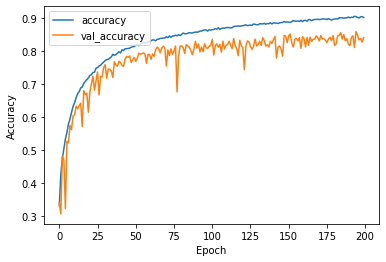

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

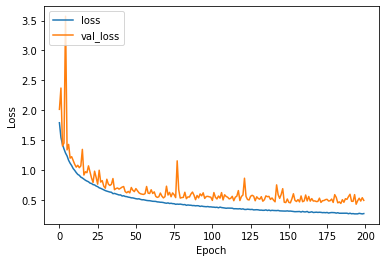

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

In [ ]:
model.save('cifar10_att56_adam_nal_resnet_200epoch.h5')